In [1]:
%load_ext autoreload
%autoreload 2

import jax.numpy as np
import matplotlib.pyplot as plt

import dissociation as ds

plt.style.use("./style.mplstyle")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from cycler import cycler

blues = [
    "#00153b",
    "#001f47",
    "#002953",
    "#00335f",
    "#003e6b",
    "#004977",
    "#005484",
    "#006090",
    "#006c9d",
    "#0078aa",
    "#0884b7",
    "#228fc3",
    "#369bd0",
    "#47a7dc",
    "#56b2e8",
    "#64bef5",
    "#72cbfe",
    "#81d9ff",
    "#90e6ff",
    "#9ef4ff",
]
reds = [
    "#35001e",
    "#520537",
    "#6a1d4c",
    "#813361",
    "#994976",
    "#b15f8d",
    "#c975a3",
    "#e28cbb",
    "#faa5d4",
    "#ffc5f5",
]

In [15]:
in_dim = 4
hidden_dim = 7
out_dim = 3
p = 3

steps = 501

xs, ys = ds.random_regression_task(in_dim, out_dim, p)
w1s, w2s = ds.walk_mrns(xs, ys, hidden_dim, steps, alpha=0.005)

In [16]:
h1s = np.einsum("thi,in->thn", w1s, xs)
ys_ = np.einsum("toh,thi,in->ton", w2s, w1s, xs)
loss = 0.5 * np.linalg.norm(ys_ - ys, axis=(1, 2)) ** 2

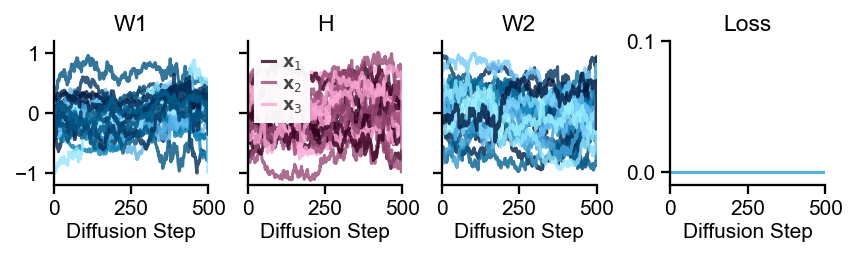

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(1.4 * 4, 1.6))
axs = axs.flatten()

ax = axs[0]
ax.set_prop_cycle(cycler(color=blues))
ax.plot(w1s.reshape(steps, -1), alpha=0.8)
ax.set_title("W1")

ax = axs[1]
# ax.set_prop_cycle(cycler(color=reds))
for j in range(hidden_dim):
    for i in range(3):
        if j == 0:
            ax.plot(
                h1s[:, j, i],
                c=reds[i * 4],
                label="$\\mathbf{x}_" + str(i + 1) + "$",
                alpha=0.8,
            )
        else:
            ax.plot(h1s[:, j, i], c=reds[i * 4], alpha=0.8)
ax.set_title("H")

ax.legend(
    loc="upper left",
    frameon=True,
    edgecolor="w",
    facecolor="w",
    framealpha=0.95,
    borderpad=0.4,
)

ax = axs[2]
ax.set_prop_cycle(cycler(color=blues))
ax.plot(w2s.reshape(steps, -1), alpha=0.8)
ax.set_title("W2")

ax = axs[3]
ax.plot(loss)
ax.set_ylim(-0.01, 0.1)
ax.set_yticks([0, 0.1])
ax.set_title("Loss")

for i in range(4):
    axs[i].set_xlabel("Diffusion Step")

for i in range(3):
    axs[i].set_ylim(-1.2, 1.2)

axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

plt.savefig("../results/fig0/random-walk.svg", dpi=300)